# SastaTicket Datathon Flight Price Prediction and Analysis

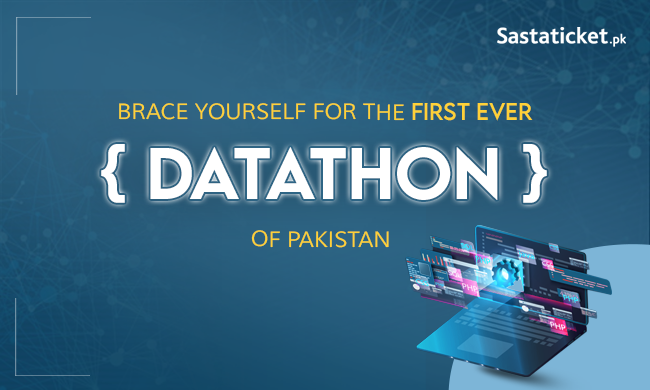

In [127]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import metrics
import warnings
import pickle
import category_encoders as ce
import math
warnings.filterwarnings('ignore')

In [123]:
# Set maximum number of columns
pd.set_option('display.max_columns', None)

In [124]:
# Set Number of Samples from the file to be trained ( Its for Normal Computer If you have a good high level server then full data can be trained)
n_samples = 21776590

# Importing dataset¶
1.Since data is in form of csv file we have to use pandas read_csv to load the data.

2.After loading it is important to check null values in a column or a row

3.If it is present then following can be done,

Filling NaN values with mean, median and mode using fillna() method
If Less missing values, we can drop it as well

In [89]:
# loading x_test.csv file
df_X_test = pd.read_csv("X_test.csv")

In [90]:
#information about the data
df_X_test.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4532489 entries, 0 to 4532488
Data columns (total 10 columns):
 #   Column  Dtype  
---  ------  -----  
 0   f1      object 
 1   f2      object 
 2   f3      object 
 3   f4      object 
 4   f5      object 
 5   f6      object 
 6   f7      bool   
 7   f8      float64
 8   f9      int64  
 9   f10     object 
dtypes: bool(1), float64(1), int64(1), object(7)
memory usage: 315.5+ MB


In [91]:
#describe about the data
df_X_test.describe()

,f8,f9
count,4.532489e+06,4.532489e+06
mean,2.201668e+01,9.891111e-01
std,7.738736e+00,5.539422e-01
min,0.000000e+00,0.000000e+00
25%,2.000000e+01,1.000000e+00
50%,2.000000e+01,1.000000e+00
75%,2.000000e+01,1.000000e+00
max,4.000000e+01,2.000000e+00


In [92]:
#checking total number of rows and columns
print(df_X_test.shape) 
#Initial structure of the data
df_X_test.head()

(4532489, 10)


,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10
0,2021-09-01 08:30:19.320999+00:00,x,y,2021-09-08 11:00:00+00:00,2021-09-08 12:55:00+00:00,beta,True,40.0,0,b-69
1,2021-09-01 08:30:19.320999+00:00,x,y,2021-09-08 14:00:00+00:00,2021-09-08 15:55:00+00:00,beta,True,40.0,0,b-9
2,2021-09-01 08:30:19.320999+00:00,x,y,2021-09-08 05:00:00+00:00,2021-09-08 06:55:00+00:00,beta,True,20.0,0,b-1
3,2021-09-01 08:30:20.396761+00:00,x,y,2021-09-08 05:30:00+00:00,2021-09-08 07:30:00+00:00,gamma,True,20.0,2,c-2
4,2021-09-01 08:30:20.396761+00:00,x,y,2021-09-08 05:30:00+00:00,2021-09-08 07:30:00+00:00,gamma,True,20.0,1,c-2


In [93]:
#finding the null values
df_X_test.isnull().sum()

f1     0
f2     0
f3     0
f4     0
f5     0
f6     0
f7     0
f8     0
f9     0
f10    0
dtype: int64

In [94]:
# loading y_train.csv file
df_y_train = pd.read_csv("y_train.csv")

In [95]:
#Initial structure of the data
df_y_train.head()

,Unnamed: 0,target
0,0,7400.0
1,1,8650.0
2,2,9150.0
3,3,10400.0
4,4,8697.0


In [96]:
#Remove unwanted column
df_y_train.drop(['Unnamed: 0'],axis=1, inplace=True)

In [97]:
#information about the data
df_y_train.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21776590 entries, 0 to 21776589
Data columns (total 1 columns):
 #   Column  Dtype  
---  ------  -----  
 0   target  float64
dtypes: float64(1)
memory usage: 166.1 MB


In [98]:
#describe about the data
df_y_train.describe()

,target
count,2.177659e+07
mean,1.013705e+04
std,3.447472e+03
min,0.000000e+00
25%,7.796000e+03
50%,9.380000e+03
75%,1.124500e+04
max,3.500000e+04


In [99]:
#checking total number of rows and columns
print(df_y_train.shape) 

(21776590, 1)


In [100]:
#Initial structure of the data
df_y_train.head()

,target
0,7400.0
1,8650.0
2,9150.0
3,10400.0
4,8697.0


In [101]:
#finding the null values
df_y_train.isnull().sum()

target    0
dtype: int64

In [102]:
#Read 
df_X_train = pd.read_csv("X_train.csv")

In [103]:
#Initial structure of the data
df_X_train.head(10)

,Unnamed: 0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10
0,0,2020-12-31 09:46:17.463002+00:00,x,y,2021-01-10 05:00:00+00:00,2021-01-10 07:00:00+00:00,gamma,True,0.0,0,c-2
1,1,2020-12-31 09:46:17.463002+00:00,x,y,2021-01-10 05:00:00+00:00,2021-01-10 07:00:00+00:00,gamma,True,32.0,1,c-2
2,2,2020-12-31 09:46:17.463002+00:00,x,y,2021-01-10 11:00:00+00:00,2021-01-10 13:00:00+00:00,gamma,True,32.0,1,c-4
3,3,2020-12-31 09:46:17.463002+00:00,x,y,2021-01-10 11:00:00+00:00,2021-01-10 13:00:00+00:00,gamma,True,32.0,2,c-4
4,4,2020-12-31 09:46:18.191119+00:00,x,y,2021-01-25 11:00:00+00:00,2021-01-25 12:55:00+00:00,beta,False,20.0,0,b-69
5,5,2020-12-31 09:46:18.191119+00:00,x,y,2021-01-25 05:00:00+00:00,2021-01-25 06:55:00+00:00,beta,False,20.0,0,b-1
6,6,2020-12-31 09:46:18.191119+00:00,x,y,2021-01-25 14:00:00+00:00,2021-01-25 15:55:00+00:00,beta,False,20.0,0,b-9
7,7,2020-12-31 09:46:18.191119+00:00,x,y,2021-01-25 16:00:00+00:00,2021-01-25 17:55:00+00:00,beta,False,20.0,0,b-19
8,8,2020-12-31 09:46:19.878719+00:00,x,y,2021-01-25 11:00:00+00:00,2021-01-25 13:00:00+00:00,gamma,True,32.0,2,c-4
9,9,2020-12-31 09:46:19.878719+00:00,x,y,2021-01-25 11:00:00+00:00,2021-01-25 13:00:00+00:00,gamma,True,32.0,1,c-4


In [104]:
#information about the data
df_X_train.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21776590 entries, 0 to 21776589
Data columns (total 11 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Unnamed: 0  int64  
 1   f1          object 
 2   f2          object 
 3   f3          object 
 4   f4          object 
 5   f5          object 
 6   f6          object 
 7   f7          bool   
 8   f8          float64
 9   f9          int64  
 10  f10         object 
dtypes: bool(1), float64(1), int64(2), object(7)
memory usage: 1.6+ GB


In [105]:
#describe about the data
df_X_train.describe()

,Unnamed: 0,f8,f9
count,2.177659e+07,2.177659e+07,2.177659e+07
mean,1.088829e+07,2.258956e+01,9.491727e-01
std,6.286360e+06,8.885366e+00,6.077294e-01
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.444147e+06,2.000000e+01,1.000000e+00
50%,1.088829e+07,2.000000e+01,1.000000e+00
75%,1.633244e+07,3.200000e+01,1.000000e+00
max,2.177659e+07,4.500000e+01,2.000000e+00


In [106]:
#finding the null values
df_X_train.isnull().sum()

Unnamed: 0    0
f1            0
f2            0
f3            0
f4            0
f5            0
f6            0
f7            0
f8            0
f9            0
f10           0
dtype: int64

In [107]:
# Checking row of x and y train data set
df_X_train.shape[0] == df_y_train.shape[0]

True

In [108]:
# Logical names to the columns 
test_columns = ["Ticket Purchase Date Time","Origin","Destination","Departure Date Time",
                    "Arrival Date Time","Airline","Refundable Ticket","Baggage Weight","Baggage Pieces",
                    "Flight Number"]
def assignColumns(df):   

     # Dropif we have extra unused column
    if 'Unnamed: 0' in df:
        df = df.drop(['Unnamed: 0'],axis = 1)
    
    # Giving logical names to the column for better understanding
    df.columns = test_columns
    
    return df;


# Data Cleaning & Pre Processing



In [109]:
# defining date time formatter as per data 
dateTimeFormatter = '%Y-%m-%d %H:%M:%S.%f'


In [110]:

def prepareData(df):
    pd.options.mode.chained_assignment = None 
    
    df = assignColumns(df);
    
    # The datatypes of "Ticket Purchase Date Time","Departure Date Time" and "Arrival Date Time" is object.So,firstly we convert it into date and time for proper predicion.
    # dt.day method will extract only day of that date
    # dt.month method will extract only month of that date
    # dt.year method will extract only year of that date
    # dt.hour method will extract only hour of that date
    # dt.minute method will extract only minute of that date    
    
    df[[test_columns[0],test_columns[3],test_columns[4]]] = df[[test_columns[0],test_columns[3],test_columns[4]]].apply(pd.to_datetime, format=dateTimeFormatter)
    #seperating 
    df["Ticket Purchase Day"] = pd.to_datetime(df[test_columns[0]],format=dateTimeFormatter).dt.day
    df["Ticket Purchase Month"] = pd.to_datetime(df[test_columns[0]],format=dateTimeFormatter).dt.month
    df["Ticket Purchase Year"] = pd.to_datetime(df[test_columns[0]],format=dateTimeFormatter).dt.year
    df["Ticket Purchase Hour"] = pd.to_datetime(df[test_columns[0]],format=dateTimeFormatter).dt.hour
    df["Ticket Purchase_Minute"] = pd.to_datetime(df[test_columns[0]],format=dateTimeFormatter).dt.minute

    df["Departure Day"] = pd.to_datetime(df[test_columns[3]],format=dateTimeFormatter).dt.day
    df["Departure Month"] = pd.to_datetime(df[test_columns[3]],format=dateTimeFormatter).dt.month
    df["Departure Year"] = pd.to_datetime(df[test_columns[3]],format=dateTimeFormatter).dt.year
    df["Departure Hour"] = pd.to_datetime(df[test_columns[3]],format=dateTimeFormatter).dt.hour
    df["Departure Minute"] = pd.to_datetime(df[test_columns[3]],format=dateTimeFormatter).dt.minute
    
    df["Arrival Day"] = pd.to_datetime(df[test_columns[4]],format=dateTimeFormatter).dt.day
    df["Arrival Month"] = pd.to_datetime(df[test_columns[4]],format=dateTimeFormatter).dt.month
    df["Arrival Year"] = pd.to_datetime(df[test_columns[4]],format=dateTimeFormatter).dt.year
    df["Arrival Hour"] = pd.to_datetime(df[test_columns[4]],format=dateTimeFormatter).dt.hour
    df["Arrival Minute"] = pd.to_datetime(df[test_columns[4]],format=dateTimeFormatter).dt.minute

    # Calculating flight duration  by DepartHour and Arrival hours and minutes
    DepartHours = df["Departure Hour"] + (df["Departure Minute"]/60)
    ArrivalHours = df["Arrival Hour"] + (df["Arrival Minute"]/60)
    
    # Adding flight duration column in dataframe
    df["FlightDuration"] = ArrivalHours - DepartHours
    
    # From "Ticket Purchase Date Time","Departure Date Time" and "Arrival Date Time" features, we extract day,month, year, hour and minute and stored in new columns and drop these columns¶
    df.drop([test_columns[0],test_columns[1],test_columns[2],test_columns[3], test_columns[4]], axis = 1, inplace = True)
    
    # As "Flight Number" is Nominal Categorical data we will perform OneHotEncoding
    #FlightNumber = pd.get_dummies(df[test_columns[9]], drop_first= True) 
    
    # Perform label encoding on "Refundable Ticket", "Airline" and  "Baggage Pieces" data
    df.replace({True: 1, False: 0}, inplace = True)
    #df.replace({'alpha': 0, 'gamma': 1, "beta":2,"omega":3}, inplace = True)
    df.replace({0: 0, 15:1, 20:2, 32:3, 35:4, 40:5, 45:6}, inplace = True)

    # Concatenate OneHotEncoding data
    #df = pd.concat([df, FlightNumber], axis = 1)
    
    # Drop "Flight Number" as new OneHotEncoding column is already added 
    #df.drop([test_columns[9]], axis = 1, inplace = True)

    # return clean dataframe
    return df


In [111]:
df_X_test = prepareData(df_X_test)

In [112]:
df_X_train = prepareData(df_X_train)

In [113]:
col = df_X_train.columns

# Count of flights with different Airlines

In [ ]:
plt.figure(figsize = (10, 7))
plt.title('Count of flights with different Airlines')
ax=sns.countplot(x = 'Airline', data = df_X_train)
plt.xlabel('Airline')
plt.ylabel('Count of flights')
plt.xticks(rotation = 90)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',
                    color= 'black')

# Group by Airline

In [ ]:
df_X_train.groupby('Airline').sum()


# Airline vs Price

In [14]:
df_X_train['Price'] = df_y_train['target']

In [ ]:
fig = px.histogram(df_X_train, 
                   x='Price', 
                   marginal='box', 
                   color='Airline', 
                   color_discrete_sequence=['green', 'grey','red','orange','blue','blueviolet', 'brown', 'burlywood', 'chocolate', 'darkblue','olive','pink'], 
                   title='Airline vs Price')
fig.update_layout(bargap=0.1)
fig.show()

# Flight Number vs Price

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Flight Number',y='Price',data=df_X_train.sort_values('Price',ascending=False))

# Airline, Flight Number and Price visualization with 3D view¶


In [ ]:
fig = px.scatter_3d(df_X_train, x='Airline', y='Flight Number', z='Price')
fig.update_traces(marker_size=3, marker_opacity=0.5)
fig.show()

# Finding corelation 

In [ ]:
plt.figure(figsize=(18,18))
sns.heatmap(df_X_test.corr(),annot=True,cmap='RdYlGn')
plt.show()

# FlightDuration vs Price visualization with scatter plot¶


In [ ]:
fig = px.scatter(df_X_train, 
                 x='FlightDuration', 
                 y='Price', 
                 #color='Source', 
                 opacity=0.8, 
                 hover_data=['Airline'], 
                 title='Flight Duration vs. Price')
fig.update_traces(marker_size=5)
fig.show()

# Frequency of Flight based on Arrival and Departure  day and month

In [ ]:
fig = plt.figure(figsize=(15,25))
plt.subplot(221) 
plt.hist(df_X_train['Arrival Day'] , bins=12)
plt.xlabel('Departure Day',fontsize = 15 , fontweight='bold' , fontstyle='italic')
plt.ylabel('Frequency',fontsize = 15 , fontweight='bold' , fontstyle='italic')

plt.subplot(222) 
plt.hist(df_X_train['Arrival Month'] , bins=12)
plt.xlabel('Arrival Month',fontsize = 15 , fontweight='bold' , fontstyle='italic')
plt.ylabel('Frequency',fontsize = 15 , fontweight='bold' , fontstyle='italic')

plt.subplot(223) 
plt.hist(df_X_train['Departure Day'] , bins=12)
plt.xlabel('Departure Day',fontsize = 15 , fontweight='bold' , fontstyle='italic')
plt.ylabel('Frequency',fontsize = 15 , fontweight='bold' , fontstyle='italic')


plt.subplot(224) 
plt.hist(df_X_train['Departure Month'] , bins=12)
plt.xlabel('Arrival Month',fontsize = 15 , fontweight='bold' , fontstyle='italic')
plt.ylabel('Frequency',fontsize = 15 , fontweight='bold' , fontstyle='italic')


plt.show()

Our observations:

- Most flights are in the month of Janruary
- Most flights are in 1st week of the all months.

# Day Expand and Cost visualization with Animation¶


In [ ]:
px.scatter(data_frame=df_X_train,
                x= 'Price',
                y='Departure Day',
                size='Departure Month',
                color='FlightDuration',
                title= 'Day Expand and Cost',
                labels= {'Price': 'Cost','Departure_Day': 'Day Expand'},
                log_x= True,
                range_y= [0,400],
                hover_name= 'Airline',
                animation_frame='Price',
                height= 400,
                size_max=40)

# Feature Selection / Training & Testing Model with Parameter Hypertuning


In [ ]:
df_X_train.drop(['Price'],axis=1, inplace=True)
df_X_train.drop(['FlightDuration'],axis=1, inplace=True)


In [114]:
#encoding
encoder = ce.OrdinalEncoder(cols=col)

In [115]:
# Encoding train & test data samples
x_train = encoder.fit_transform(df_X_train)
x_test = encoder.transform(df_X_test)

In [126]:
# We have use a vast number of Models, but if the data is heavy then its recommend to use the models depending on your system.
algorithms = {

	'RandomForestRegressor': {
		'model': RandomForestRegressor(),
		'param': {
			'n_estimators': [300, 500, 700, 1000, 2100],
			'max_depth': [3, 5, 7, 9, 11, 13, 15],
			'max_features': ["auto", "sqrt", "log2"],
			'min_samples_split': [2, 4, 6, 8]
		}
	},
	'GradientBoostingRegressor': {
		'model': GradientBoostingRegressor(),
		'param': {
			'learning_rate': [0.5, 0.8, 0.1, 0.20, 0.25, 0.30],
			'n_estimators': [300, 500, 700, 1000, 2100],
			'criterion': ['friedman_mse', 'mse']
		}
	},
	'KNeighborsRegressor': {
		'model': KNeighborsRegressor(),
		'param': {
			'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
		}
	},
	'DecisionTreeRegressor': {
		'model': DecisionTreeRegressor(),
		'param': {
			"splitter": ["best", "random"],
			"max_depth": [1, 3, 5, 7, 9, 11, 12],
			"min_samples_leaf": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
			"min_weight_fraction_leaf": [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
			"max_features": ["auto", "log2", "sqrt", None],
			"max_leaf_nodes": [None, 10, 20, 30, 40, 50, 60, 70, 80, 90]
		}

	},
	'ExtraTreeRegressor': {
		'model': ExtraTreeRegressor(),
		'param': {
			'max_depth': [2, 3, 4, 5, 7, 8, 9, 10],
			'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
			'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 10],
			'max_features': [0.95],
			'min_impurity_decrease': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0, 1, 10]
		}
	},
	'XGBRegressor': {
		'model': XGBRegressor(),
		'param': {
			'max_depth': [3, 18, 1],
			'gamma': [1, 9],
			'reg_alpha': [40, 180, 1],
			'reg_lambda': [0, 1],
			'colsample_bytree': [0.5, 1],
			'min_child_weight': [0, 10, 1],
			'n_estimators': [300, 500, 700, 1000, 2100]
		}
	}



}

In [ ]:
score = []
for name, mp in algorithms.items() :
    rs = RandomizedSearchCV(estimator = mp['model'], param_distributions = mp['param'], cv = 5, n_jobs=-1, verbose=2)
    rs.fit(x_train, df_y_train)
    prediction = rs.predict(x_test)
    score.append({
        'ModelName': name,
        'Model': rs,
        'Score' : rs.best_score_,
        'Params' : rs.best_params_,
        'Predictions': prediction
    }) 

In [ ]:
ModelScore = pd.DataFrame (score, columns= ['ModelName','Model', 'Score','Params','Predictions'])

In [ ]:
ModelScore

### We tried multiple models but the best model was with lowest RMSE "XGB Regressor".


# Save Model for future use

In [ ]:
# save the model to disk
filename = 'finalized_models.sav'
pickle.dump(ModelScore, open(filename, 'wb'))



In [ ]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

In [ ]:
# Since xxx model has the best score so we will use it for prediction and csv output generation 

In [ ]:
loaded_model['Model' == 'XGBRegressor'].predict(x_test)

In [61]:
predications = np.round(predications,1)

In [62]:
pd.DataFrame(predications).to_csv("output.csv",index=False,header=False)

In [ ]:
error = math.sqrt(mean_squared_error(df_y_train, predications))
r2Score = metrics.r2_score(df_y_train,predications)
error_xgb,r2Score